In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import numpy as np
import platform
import pymysql
from IPython.display import Image

In [2]:
if platform.system() == 'Windows': 
    path = r'c:\Windows\Fonts\malgun.ttf'
elif platform.system() == 'Darwin': # Mac OS
    path = r'/System/Library/Fonts/AppleGothic'
else:
    path = r'/usr/share/fonts/truetype/name/NanumMyeongjo.ttf'

In [3]:
font_path = r'c:\Windows\Fonts\malgun.ttf'
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [4]:
conn = pymysql.connect(host='localhost', user='root', password='102377', 
db = 'project6', charset='utf8')

In [5]:
cur = conn.cursor()

## 일반인들이 가지고 있는 장애인에 대한 인식

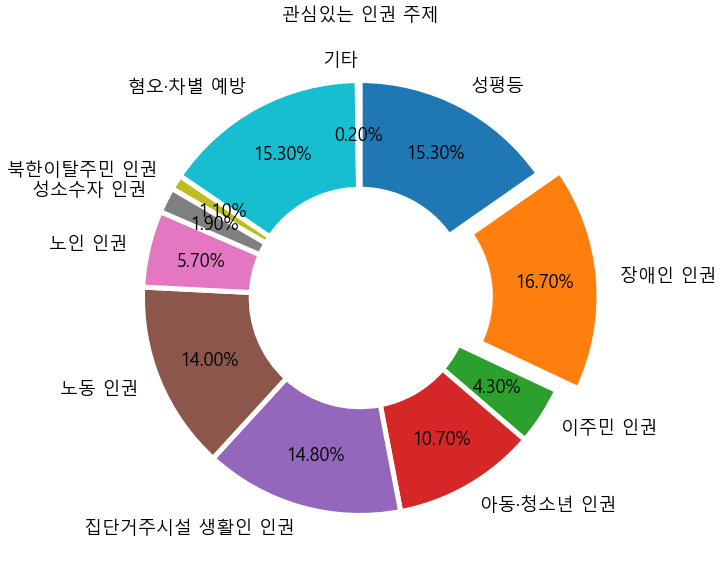

In [6]:
sql_02 = """select * from 인권_주제
where 통합 = '소계'"""
cur.execute(sql_02)
rows = cur.fetchone() # 모든 데이터를 가져옴
df_02 = pd.DataFrame(rows[1:]).T
df_02.columns = ['성평등', '장애인 인권', '이주민 인권', '아동·청소년 인권', '집단거주시설 생활인 인권', '노동 인권', '노인 인권', '성소수자 인권', '북한이탈주민 인권', '혐오·차별 예방', '기타']

fig = plt.figure(figsize=(15,10)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 배경색을 하얀색으로 설정
ax = fig.add_subplot() ## 프레임 생성
 
pie = ax.pie(df_02.iloc[0], ## 파이차트 출력
       startangle=90, ## 시작점을 90도(degree)로 지정
       counterclock=False, ## 시계 방향으로 그린다.
       autopct=lambda p : '{:.2f}%'.format(p), ## 퍼센티지 출력
       wedgeprops={'width': 0.5, 'edgecolor': 'w', 'linewidth': 5}, ## 중간의 반지름 0.5만큼 구멍을 뚫어준다.
       textprops={'fontsize': 18, 'color':"black"},
       pctdistance=0.75,
       labels = df_02.columns,
       explode = [0,0.1,0,0,0,0,0,0,0,0,0]
       )
 
plt.title('관심있는 인권 주제', fontsize = 18)
plt.show()

10개 이상의 인권 주제 중에서 가장 관심이 많은 부분은 장애인 인권(16.7%)로  
성평등, 혐오 차별, 노동 등 최근 뜨거운 감자들 사이에서 가장 높은 순위를 기록했다

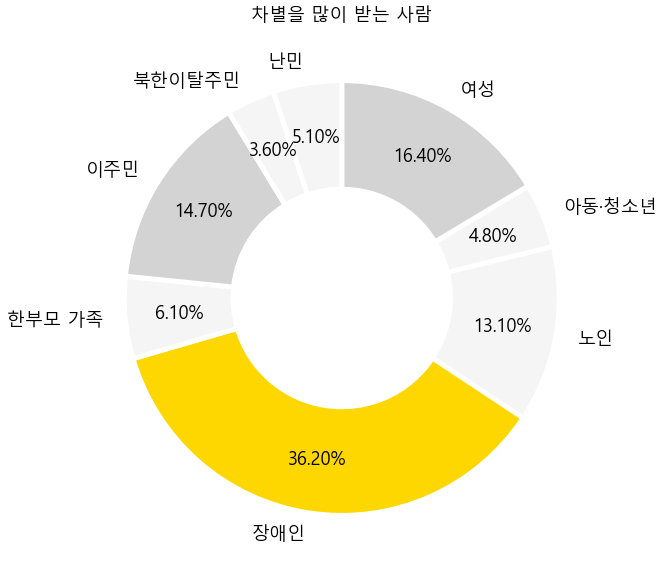

In [7]:
sql_01 = """select * from 차별을_많이_받는_사람
where 통합 = '소계'"""
cur.execute(sql_01)
rows = cur.fetchone() # 모든 데이터를 가져옴
df_01 = pd.DataFrame(rows[1:]).T
df_01.columns = ['여성', '아동·청소년', '노인', '장애인', '한부모 가족', '이주민', '북한이탈주민', '난민']

fig = plt.figure(figsize=(15,10)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 배경색을 하얀색으로 설정
ax = fig.add_subplot() ## 프레임 생성
 
pie = ax.pie(df_01.iloc[0], ## 파이차트 출력
       startangle=90, ## 시작점을 90도(degree)로 지정
       counterclock=False, ## 시계 방향으로 그린다.
       autopct=lambda p : '{:.2f}%'.format(p), ## 퍼센티지 출력
       wedgeprops={'width': 0.5, 'edgecolor': 'w', 'linewidth': 5}, ## 중간의 반지름 0.5만큼 구멍을 뚫어준다.
       colors = ['lightgray','whitesmoke','whitesmoke','gold','whitesmoke','lightgray','whitesmoke','whitesmoke','whitesmoke'],
       textprops={'fontsize': 18, 'color':"black"},
       pctdistance=0.75,
       labels = df_01.columns
       )
 
plt.title('차별을 많이 받는 사람', fontsize = 18)
plt.show()

차별을 가장 많이 받는 사람이라는 주제에서도 장애인이 36.2%로  
2위 여성(16.4%)와 3위 이주민(14.7%)를 합친 것보다 더 많은 %를 차지하고 있다.

위의 두 가지 그래프를 토대로 일반인들의 '장애인 문제'에 대한 인식은 높다는 사실을 알 수 있다.

## 장애인 복지에 대한 인식

In [8]:
sql_03 = """select * from 인권_증진_방안
where 통합 = '소계'"""
cur.execute(sql_03)
rows = cur.fetchone() # 모든 데이터를 가져옴
df_03 = pd.DataFrame(rows[1:]).T
df_03.columns = ['각 개인의 노력', '법률/제도 마련', '인권침해/차별 조사·대응', '인권교육 강화', '캠페인, 홍보 활동']

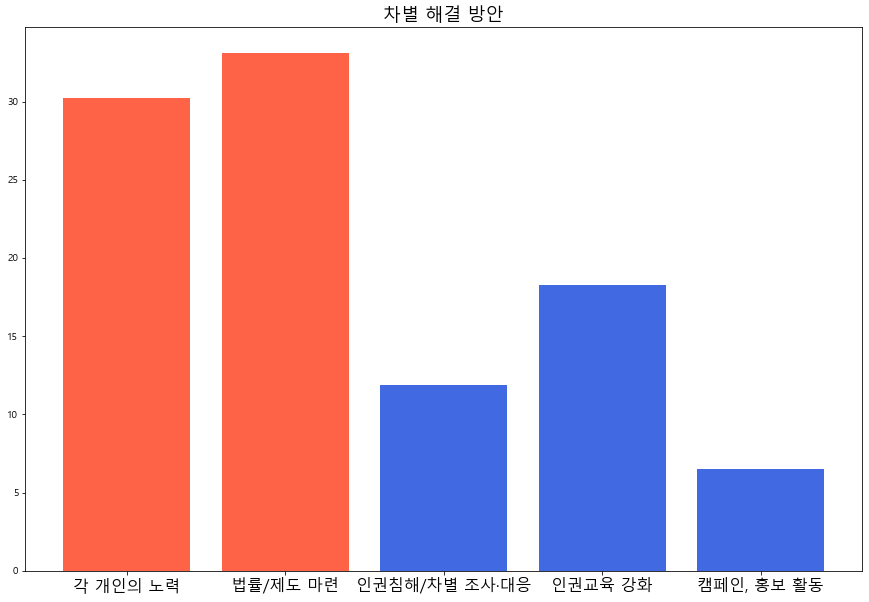

In [9]:
fig = plt.figure(figsize=(15,10)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 배경색을 하얀색으로 설정
ax = fig.add_subplot() ## 프레임 생성

plt.bar(df_03.columns, df_03.iloc[0], color = ['tomato','tomato','royalblue','royalblue','royalblue'])

plt.title('차별 해결 방안', fontsize = 18)
plt.xticks(fontsize= 16 )
plt.show()

장애인 차별을 해결하기 위해서 일반인들이 가장 중요하게 생각하는 부분은  
'개인의 노력'과 '법률/제도 마련'이다.

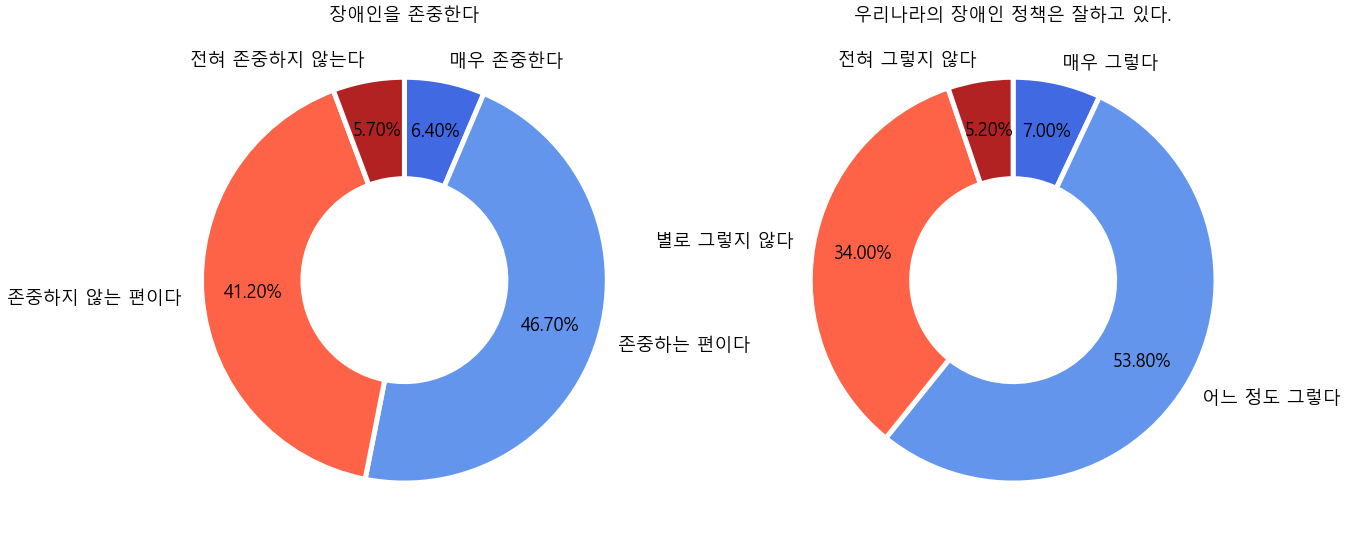

In [10]:
f, axes = plt.subplots(1, 2)
f.set_size_inches((20, 15))

sql_04 = """select * from 장애인_존중_평가
where 평가 = '소계'"""
cur.execute(sql_04)
rows = cur.fetchone() # 모든 데이터를 가져옴
df_04 = pd.DataFrame(rows[1:]).T
df_04.columns = ['매우 존중한다', '존중하는 편이다', '존중하지 않는 편이다', '전혀 존중하지 않는다']

axes[0].pie(df_04.iloc[0], ## 파이차트 출력
       startangle=90, ## 시작점을 90도(degree)로 지정
       counterclock=False, ## 시계 방향으로 그린다.
       autopct=lambda p : '{:.2f}%'.format(p), ## 퍼센티지 출력
       wedgeprops={'width': 0.5, 'edgecolor': 'w', 'linewidth': 5}, ## 중간의 반지름 0.5만큼 구멍을 뚫어준다.
       colors = ['royalblue','cornflowerblue','tomato','firebrick'],
       textprops={'fontsize': 18, 'color':"black"},
       pctdistance=0.75,
       labels = df_04.columns
       )
 
axes[0].set_title('장애인을 존중한다', fontsize = 18)

sql_05 = """select * from 정부_평가
where 평가 = '소계'"""
cur.execute(sql_05)
rows = cur.fetchone() # 모든 데이터를 가져옴
df_05 = pd.DataFrame(rows[1:]).T
df_05.columns = ['매우 그렇다', '어느 정도 그렇다', '별로 그렇지 않다', '전혀 그렇지 않다']

axes[1].pie(df_05.iloc[0], ## 파이차트 출력
       startangle=90, ## 시작점을 90도(degree)로 지정
       counterclock=False, ## 시계 방향으로 그린다.
       autopct=lambda p : '{:.2f}%'.format(p), ## 퍼센티지 출력
       wedgeprops={'width': 0.5, 'edgecolor': 'w', 'linewidth': 5}, ## 중간의 반지름 0.5만큼 구멍을 뚫어준다.
       colors = ['royalblue','cornflowerblue','tomato','firebrick'],
       textprops={'fontsize': 18, 'color':"black"},
       pctdistance=0.75,
       labels = df_05.columns
       )
 
axes[1].set_title('우리나라의 장애인 정책은 잘하고 있다.', fontsize = 18)
plt.show()


위와 같은 해결책의 연관되어 '스스로 장애인을 존중하는가?'  
라는 질문에 대해 긍정적으로 대답하는 비중이 높았다.

법률/제도와 관련된 정부 정책에 대한 평가도 긍정적인 부분이  
더 높다는 사실을 알 수 있다.

종합해보면 일반인들은 장애인 차별을 해결하기위한 방안이 잘 시행되고 있다고 인식한다.

## 장애인들의 인식은 어떨까?

In [11]:
sql_06 = """select * from 장애등록_후_지원_의식_평가
WHERE 평가 = '소계';"""
cur.execute(sql_06)
rows = cur.fetchone() # 모든 데이터를 가져옴
df_06 = pd.DataFrame(rows[1:]).T
df_06.columns = ['매우 많음', '약간 받고 있음', '별로 받지 못하고 있음', '전혀 받지 못하고 있음']

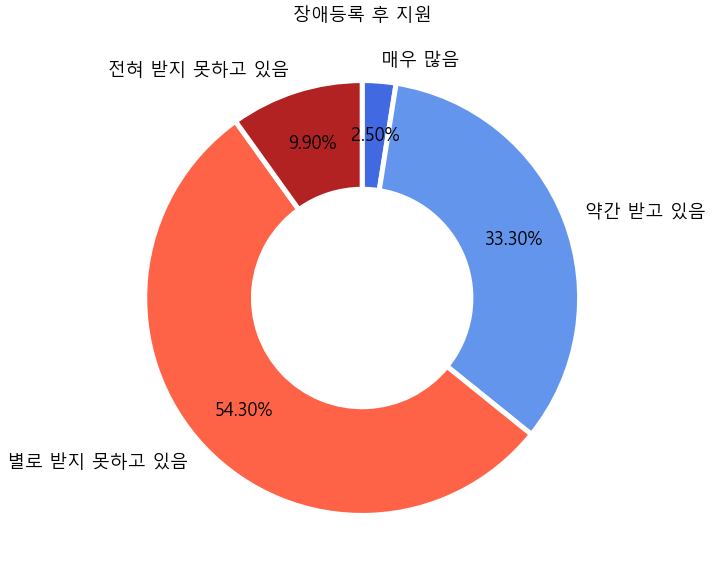

In [12]:
fig = plt.figure(figsize=(15,10)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 배경색을 하얀색으로 설정
ax = fig.add_subplot() ## 프레임 생성
 
pie = ax.pie(df_06.iloc[0], ## 파이차트 출력
       startangle=90, ## 시작점을 90도(degree)로 지정
       counterclock=False, ## 시계 방향으로 그린다.
       autopct=lambda p : '{:.2f}%'.format(p), ## 퍼센티지 출력
       wedgeprops={'width': 0.5, 'edgecolor': 'w', 'linewidth': 5}, ## 중간의 반지름 0.5만큼 구멍을 뚫어준다.
       colors = ['royalblue','cornflowerblue','tomato','firebrick'],
       textprops={'fontsize': 18, 'color':"black"},
       pctdistance=0.75,
       labels = df_06.columns
       )
 
plt.title('장애등록 후 지원', fontsize = 18)
plt.show()

일반인들의 인식과는 반대로 장애인들은  
장애등록 후 지원에 대해 부정적인 인식이 주를 이뤘다.

C:\Users\hune1\AppData\Local\Temp\ipykernel_29844\1751016896.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(df_07.columns, fontsize =15)
C:\Users\hune1\AppData\Local\Temp\ipykernel_29844\1751016896.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(df_07_2.columns, fontsize =15)


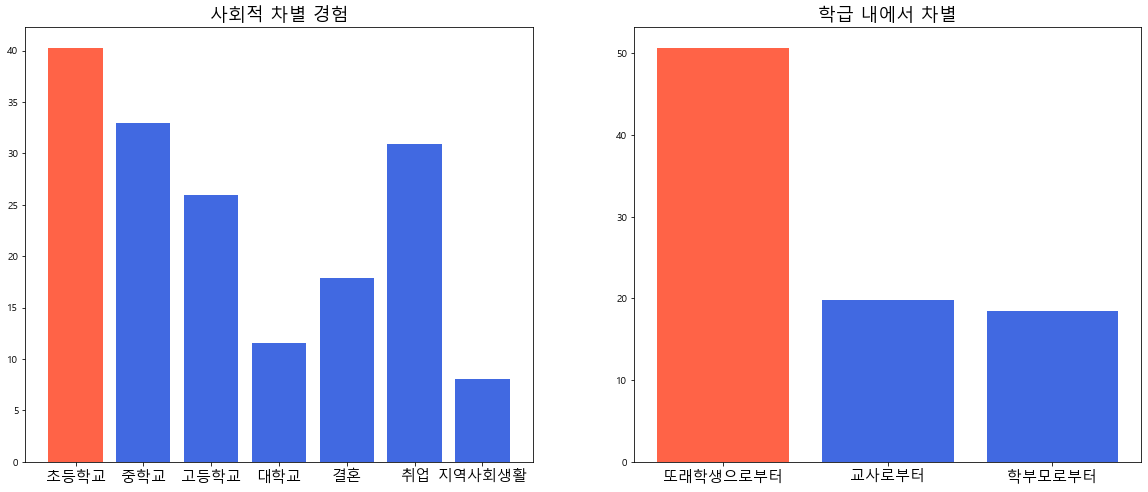

In [13]:
f, axes = plt.subplots(1, 2)
f.set_size_inches((20, 8))

sql_07 = """select 초등학교, 중학교, 고등학교, 대학교,
결혼, 취업, 지역사회생활 from 사회적_차별_경험
where 통합 = '소계';"""
cur.execute(sql_07)
rows = cur.fetchone() # 모든 데이터를 가져옴
df_07 = pd.DataFrame(rows).T
df_07.columns = ['초등학교', '중학교', '고등학교', '대학교',
'결혼', '취업', '지역사회생활']

axes[0].bar(df_07.columns, df_07.iloc[0].astype(float), color = ['tomato','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue'])

axes[0].set_title('사회적 차별 경험', fontsize = 18)
axes[0].set_xticklabels(df_07.columns, fontsize =15)

sql_07_2 = """select 또래학생으로부터, 교사로부터, 학부모로부터 from 사회적_차별_경험
where 통합 = '소계';"""
cur.execute(sql_07_2)
rows = cur.fetchone() # 모든 데이터를 가져옴
df_07_2 = pd.DataFrame(rows).T
df_07_2.columns = ['또래학생으로부터', '교사로부터', '학부모로부터']

axes[1].bar(df_07_2.columns, df_07_2.iloc[0], color = ['tomato','royalblue','royalblue'])

axes[1].set_title('학교에서 차별 경험', fontsize = 18)
axes[1].set_xticklabels(df_07_2.columns, fontsize =15)
 
axes[1].set_title('학급 내에서 차별', fontsize = 18)
plt.show()


사회적 차별을 가장 많이 겪은 곳은 '초등학교'이며 '또래학생'으로부터 가장 많은 차별을 받아왔다고 응답했다.

장애인들이 가장 많이 차별을 느끼는 학교 생활을 개선하기 위해 정부에서는 어떤 방안을 채택했을까?

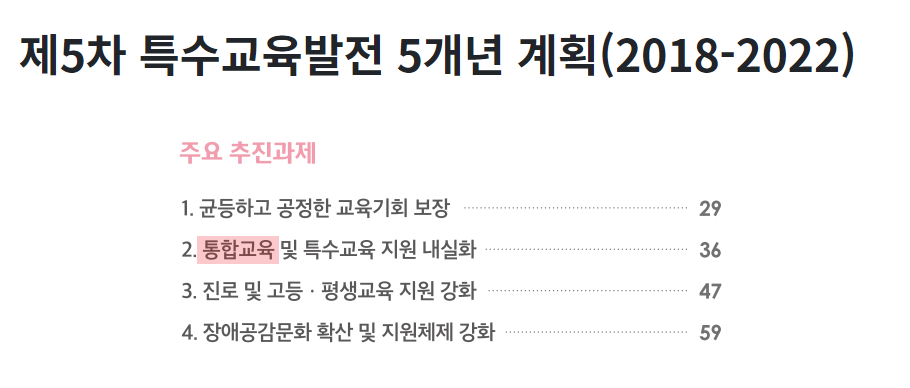

In [14]:
Image("./img_01.png")

우리나라의 통합교육 현황은?

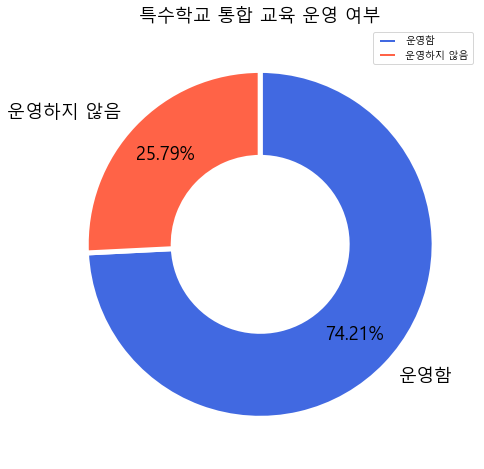

In [15]:
sql_08 = """select 운영함, `운영하지 않음` from 특수학교_통합교육_운영_여부
where 통합 = '소계' and 항목 = '대상자수 (명)';"""
cur.execute(sql_08)
rows = cur.fetchone() # 모든 데이터를 가져옴
df_08 = pd.DataFrame(rows).T
cur.description
df_08.columns = ['운영함', '운영하지 않음']

fig = plt.figure(figsize=(10,8)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 배경색을 하얀색으로 설정
ax = fig.add_subplot() ## 프레임 생성
 
pie = ax.pie(df_08.iloc[0], ## 파이차트 출력
       startangle=90, ## 시작점을 90도(degree)로 지정
       counterclock=False, ## 시계 방향으로 그린다.
       autopct=lambda p : '{:.2f}%'.format(p), ## 퍼센티지 출력
       wedgeprops={'width': 0.5, 'edgecolor': 'w', 'linewidth': 5}, ## 중간의 반지름 0.5만큼 구멍을 뚫어준다.
       colors = ['royalblue','tomato'],
       textprops={'fontsize': 18, 'color':"black"},
       pctdistance=0.75,
       labels = df_08.columns
       )
 
plt.legend(pie[0], df_08.columns) ## 범례 표시
plt.title('특수학교 통합 교육 운영 여부', fontsize = 18)
plt.show()

통합교육을 운영하는 학교의 비중은 높다

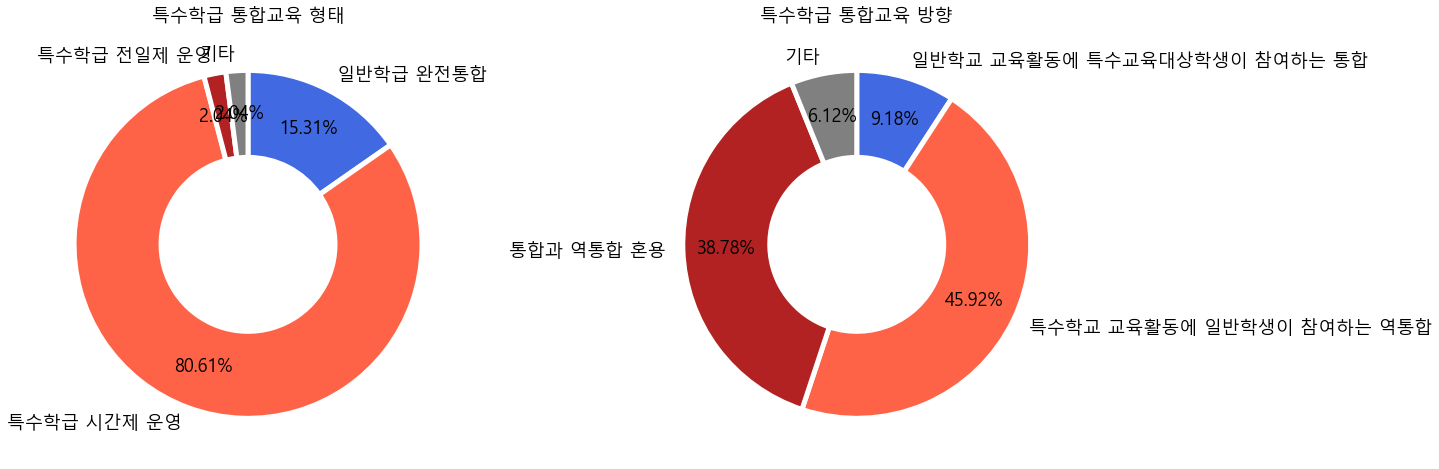

In [16]:
f, axes = plt.subplots(1, 2)
f.set_size_inches((20, 8))

sql_09 = """select `일반학급 완전통합`, `특수학급 시간제 운영`, `특수학급 전일제 운영`, 기타
from 특수학급_통합교육_형태
where 통합 = '전체' and 항목 = '비율 (%)';"""
cur.execute(sql_09)
rows = cur.fetchone() # 모든 데이터를 가져옴
df_09 = pd.DataFrame(rows).T
df_09.columns = ['일반학급 완전통합', '특수학급 시간제 운영','특수학급 전일제 운영','기타']

axes[0].pie(df_09.iloc[0], ## 파이차트 출력
       startangle=90, ## 시작점을 90도(degree)로 지정
       counterclock=False, ## 시계 방향으로 그린다.
       autopct=lambda p : '{:.2f}%'.format(p), ## 퍼센티지 출력
       wedgeprops={'width': 0.5, 'edgecolor': 'w', 'linewidth': 5}, ## 중간의 반지름 0.5만큼 구멍을 뚫어준다.
       colors = ['royalblue','tomato','firebrick','gray'],
       textprops={'fontsize': 18, 'color':"black"},
       pctdistance=0.75,
       labels = df_09.columns
       )
 
axes[0].set_title('특수학급 통합교육 형태', fontsize = 18)

sql_10 = """select `일반학교 교육활동에 특수교육대상학생이 참여하는 통합`, `특수학교 교육활동에 일반학생이 참여하는 역통합`, `통합과 역통합 혼용`, 기타 from 특수학교_통합_방법
where 통합 = '소계' and 항목 = '비율 (%)';"""
cur.execute(sql_10)
rows = cur.fetchone() # 모든 데이터를 가져옴
df_10 = pd.DataFrame(rows).T
df_10.columns = ['일반학교 교육활동에 특수교육대상학생이 참여하는 통합', '특수학교 교육활동에 일반학생이 참여하는 역통합','통합과 역통합 혼용','기타']

axes[1].pie(df_10.iloc[0], ## 파이차트 출력
       startangle=90, ## 시작점을 90도(degree)로 지정
       counterclock=False, ## 시계 방향으로 그린다.
       autopct=lambda p : '{:.2f}%'.format(p), ## 퍼센티지 출력
       wedgeprops={'width': 0.5, 'edgecolor': 'w', 'linewidth': 5}, ## 중간의 반지름 0.5만큼 구멍을 뚫어준다.
       colors = ['royalblue','tomato','firebrick','gray'],
       textprops={'fontsize': 18, 'color':"black"},
       pctdistance=0.75,
       labels = df_10.columns
       )
 
axes[1].set_title('특수학급 통합교육 방향', fontsize = 18)
plt.show()

하지만 특수학급 통합교육 형태는 특수학급에서 시간제 운영이 주를 이뤘고  
일반학생과 특수학교 학생 간의 통합 방향도 통합교육의 본래목적인  
일반학교 교육활동에 특수교육대상학생이 참여하는 방향이 아닌  
역통합 방식이 주를 이루고 있다.

## 결론

- 일반인들은 장애인 차별에 대하여 충분히 인식하고 있지만 상황이 개선되고 있다고 생각한다.  
- 하지만 그런 인식과 달리 장애인들이 인식하는 차별은 여전히 크며 주로 교육 현장에서 오는 차별이다.  
- 교육 현장을 개선하기 위해서 시행되는 '통합교육'은 수만 많을 뿐 그 내용적인 면에서 부실하다.  

### ==> 일반인들과 장애인들 사이의 인식의 격차를 줄이기 위해서는
### 통합교육의 내용을 개선하여 장애인들이 학교에서 느끼는 차별을 줄여야 한다. 